In [228]:
import pandas  as pd 
import numpy as np
import matplotlib.pyplot as plt 
import pandas_datareader as web
import datetime as dt 

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [229]:
crypto_currency = 'BNB'
against_currency ='USD'

In [230]:
start = dt.datetime(2021,1,1)
end = dt.datetime.now()#-dt.timedelta(days=50)

In [231]:
data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo',start, end)

In [232]:
def difference(data, interval=1):
	return [data[i] - data[i - interval] for i in range(interval, len(data))]
def invert_difference(orig_data, diff_data, interval=1):
	return [diff_data[i-interval] + orig_data[i-interval] for i in range(interval, len(orig_data))]

In [234]:
# Prepare Data
# scaler = MinMaxScaler(feature_range=(0,1))
# scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
scaled_data = difference(np.log10((data['Close']))).to_numpy()
# new = difference((data['Close'],1)
prediction_days = 10
future_days=0
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)-future_days):
    x_train.append(scaled_data[x-prediction_days:x])
    y_train.append(scaled_data[x+future_days])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
# y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1],1))

In [235]:
range(prediction_days, len(scaled_data))

range(10, 171)

In [236]:
#creating neural netowrk
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=25, batch_size=32)

Epoch 1/25
6/6 [==============================] - 4s 16ms/step - loss: 0.0019
Epoch 2/25
6/6 [==============================] - 0s 20ms/step - loss: 0.0019
Epoch 3/25
6/6 [==============================] - 0s 14ms/step - loss: 0.0019
Epoch 4/25
6/6 [==============================] - 0s 14ms/step - loss: 0.0018
Epoch 5/25
6/6 [==============================] - 0s 16ms/step - loss: 0.0019
Epoch 6/25
6/6 [==============================] - 0s 17ms/step - loss: 0.0019
Epoch 7/25
6/6 [==============================] - 0s 16ms/step - loss: 0.0019
Epoch 8/25
6/6 [==============================] - 0s 19ms/step - loss: 0.0023
Epoch 9/25
6/6 [==============================] - 0s 15ms/step - loss: 0.0021
Epoch 10/25
6/6 [==============================] - 0s 16ms/step - loss: 0.0019
Epoch 11/25
6/6 [==============================] - 0s 18ms/step - loss: 0.0019
Epoch 12/25
6/6 [==============================] - 0s 16ms/step - loss: 0.0019
Epoch 13/25
6/6 [==============================] - 0s 15ms/st

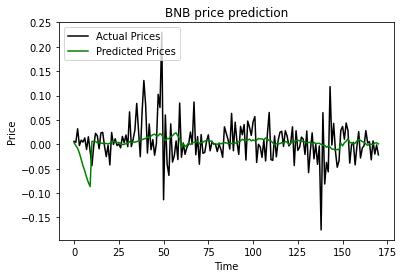

In [226]:
test_start = dt.datetime(2021,1,1)
test_end = dt.datetime.now()

test_data = web.DataReader(f'{crypto_currency}-{against_currency}','yahoo', test_start, test_end)
actual_prices = difference(np.log10((test_data['Close']))).to_numpy()

total_dataset = pd.concat((data['Close'],test_data['Close']),axis=0)
model_inputs = total_dataset[len(total_dataset) - len(test_data)-prediction_days:]
model_inputs=difference(np.log10((model_inputs))).to_numpy()
# model_inputs = model_inputs
# model_inputs = scaler.fit_transform(model_inputs)


x_test = []
for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

prediction_prices = model.predict(x_test)
# prediction_prices = scaler.inverse_transform(prediction_prices) 
plt.plot(actual_prices,color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

In [227]:
# # Predict Next Day
# real_data = [model_inputs[len(model_inputs) +1 - prediction_days: len(model_inputs) + 1,0]]
# real_data = np.reshape(real_data,-1)
# real_data = np.reshape(real_data, (real_data.shape))
# prediction = model.predict(real_data)
# prediction = scaler.inverse_transform(prediction)
# print()

In [ ]:
model_inputs

In [ ]:
re = data['Close'].to_numpy().reshape(-1,1)
data2 = scaler.fit_transform(re)
# data2[3:]
plt.plot(difference(np.log10((data2))).to_numpy(),color='black', label='Actual Prices')

In [241]:
prediction_prices

array([[ 3.27785849e-03],
       [-2.76170112e-03],
       [-8.11782479e-03],
       [-1.80638041e-02],
       [-3.06853391e-02],
       [-4.40604985e-02],
       [-5.48172258e-02],
       [-6.74937665e-02],
       [-7.84602091e-02],
       [-8.65835845e-02],
       [ 5.88850537e-03],
       [ 5.80832735e-03],
       [ 5.70417941e-03],
       [ 3.16409580e-03],
       [ 3.21200164e-03],
       [ 2.38834880e-03],
       [ 1.90832024e-03],
       [ 8.36044317e-04],
       [ 1.77731737e-03],
       [ 7.09814485e-04],
       [ 2.07129191e-03],
       [ 5.79786673e-03],
       [ 6.31370535e-03],
       [ 4.64993529e-03],
       [ 3.19825439e-03],
       [ 3.82055761e-03],
       [ 1.83590024e-03],
       [-3.87609936e-04],
       [-4.18317039e-04],
       [ 1.47106207e-03],
       [ 1.68487697e-03],
       [ 5.31355105e-03],
       [ 3.90450750e-03],
       [ 4.54298034e-03],
       [ 4.39429330e-03],
       [ 5.49801392e-03],
       [ 6.64625503e-03],
       [ 8.80704075e-03],
       [ 9.3

In [240]:
y_train

array([-4.38548902e-02, -2.94990068e-03,  2.24760619e-02,  1.75772728e-02,
       -9.18583934e-03,  2.32756165e-02,  2.45695313e-02, -3.16227350e-03,
       -2.53107141e-02, -1.81702641e-03, -4.23771813e-02,  2.41697923e-02,
       -4.47639734e-04,  1.11984372e-02, -2.68262373e-03,  7.40519268e-04,
       -7.35164711e-03,  1.62013123e-02,  3.04372793e-03,  1.90345636e-02,
       -4.84087657e-03,  6.65461616e-02, -4.66425080e-03,  9.97487122e-03,
        2.95818689e-02,  8.39145042e-02,  3.02135961e-02, -2.54709518e-02,
        6.59104104e-02,  1.30844010e-01,  8.00458268e-02, -1.81243996e-02,
        4.16169854e-02, -1.12296382e-02,  9.57147320e-03, -2.24014069e-02,
        1.63520875e-03,  1.02482179e-01,  7.54920111e-02,  2.29836399e-01,
       -1.13781701e-01,  6.00729626e-02, -4.08947442e-02, -6.37385258e-02,
        4.18461678e-02, -3.64431879e-02, -2.32767791e-02,  6.93634578e-03,
       -3.13254758e-02,  8.45712129e-02, -2.65630648e-02,  2.83528073e-03,
       -2.05575645e-02, -